In [2]:
import pandas as pd
import numpy as np

%matplotlib inline

df = pd.read_csv('df_notebook1_Transformation.csv')

## Generate a umap of the fingerprints

## Umap dimension reduction

https://pypi.org/project/umap-learn/

https://umap-learn.readthedocs.io/en/latest/basic_usage.html

I need more physiochemical properties of course..
I followed [this example](https://umap-learn.readthedocs.io/en/latest/parameters.html).

In [21]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [23]:
import umap

In [24]:
sns.set(style='white', context='poster', rc={'figure.figsize':(14,10)})
np.random.seed(42)

In [25]:
#umap_input = np.zeros(2048)*20
umap_input = np.random.randn(20,2048)    # I'd prefer to initiate it as 0, but don't know how

for i in range(len(df)-1):
    umap_input[i] = list(df.iloc[i,4])

In [26]:
fit = umap.UMAP()
%time u = fit.fit_transform(umap_input)

CPU times: user 8.07 s, sys: 80.7 ms, total: 8.15 s
Wall time: 7.91 s


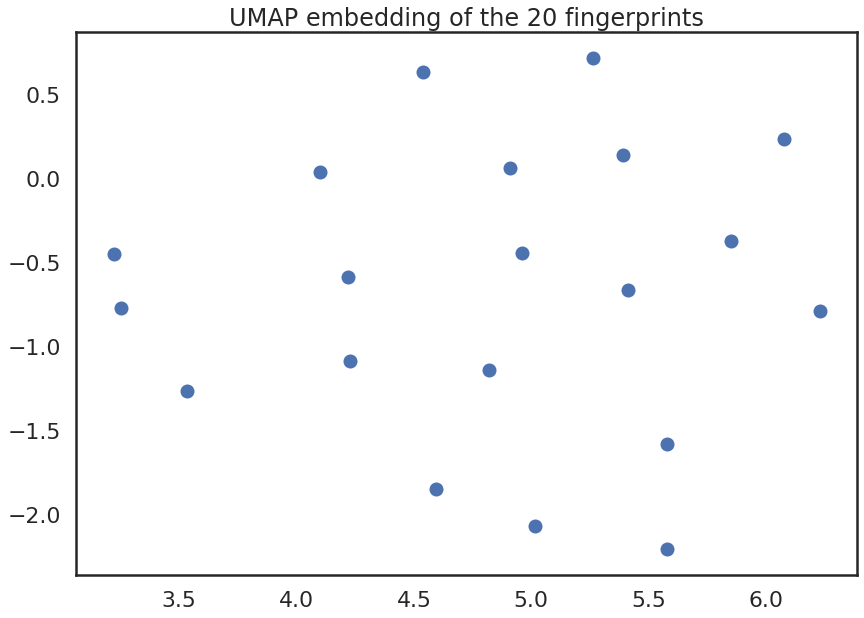

In [27]:
plt.scatter(u[:,0], u[:,1])
plt.title('UMAP embedding of the 20 fingerprints');

I could try to tweak n_neighbours, min_dist, n_components or metric.

To color by solvation, I follow a different [guide](https://umap-learn.readthedocs.io/en/latest/plotting.html).

In [ ]:
import umap.plot

In [ ]:
umap.plot.points(fit)

# Umap

### Save the output of this notebook

In [ ]:
df.to_csv('df_notebook2_UMAP.csv')